In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(r"E:\Spectrum\Project 5 (t-test, p-test, Anova test)\DataSet\Loan.csv")
df1.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,1/1/2018,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1/2/2018,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,1/3/2018,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,1/4/2018,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,1/5/2018,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0


In [4]:
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [5]:
# Convert 'LoanApproved' to numeric if not already
df1['LoanApproved'] = df1['LoanApproved'].astype(int)

# Define groups
approved = df1[df1['LoanApproved'] == 1]['AnnualIncome']
not_approved = df1[df1['LoanApproved'] == 0]['AnnualIncome']

# Preview group stats
print("Approved Mean Income:", approved.mean())
print("Not Approved Mean Income:", not_approved.mean())


Approved Mean Income: 102210.55146443515
Not Approved Mean Income: 45641.46090670171


In [6]:
from scipy.stats import ttest_ind

In [7]:
# Perform Welch’s t-test
t_stat, p_val = ttest_ind(approved, not_approved, equal_var=False)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Statistically significant difference in Annual Income between approved and not approved groups.")
else:
    print("No statistically significant difference in Annual Income.")


T-statistic: 75.08025233975937
P-value: 0.0
Statistically significant difference in Annual Income between approved and not approved groups.


In [8]:
# List of numeric columns to test
numeric_columns = [
    'Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
    'LoanDuration', 'MonthlyDebtPayments', 'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio',
    'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance',
    'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'JobTenure', 'NetWorth',
    'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
]

# Separate the groups
group_approved = df1[df1['LoanApproved'] == 1]
group_not_approved = df1[df1['LoanApproved'] == 0]

# Run t-tests and store results
ttest_results = []

for col in numeric_columns:
    stat, pval = stats.ttest_ind(group_approved[col], group_not_approved[col], equal_var=False)
    result = {
        'Feature': col,
        'Approved_Mean': group_approved[col].mean(),
        'Not_Approved_Mean': group_not_approved[col].mean(),
        'T-Statistic': stat,
        'P-Value': pval,
        'Significant (p<0.05)': 'Yes' if pval < 0.05 else 'No'
    }
    ttest_results.append(result)

# Create a DataFrame from results
ttest_df = pd.DataFrame(ttest_results)
ttest_df.sort_values('P-Value', inplace=True)

# Display the table
ttest_df.reset_index(drop=True, inplace=True)
ttest_df


,Feature,Approved_Mean,Not_Approved_Mean,T-Statistic,P-Value,Significant (p<0.05)
0,AnnualIncome,102210.551464,45641.460907,75.080252,0.000000e+00,Yes
1,LoanAmount,19144.709414,26684.996386,-44.143602,0.000000e+00,Yes
2,InterestRate,0.216393,0.246244,-49.216825,0.000000e+00,Yes
3,MonthlyIncome,8445.414923,3775.639099,76.458650,0.000000e+00,Yes
4,TotalDebtToIncomeRatio,0.153987,0.480130,-105.557507,0.000000e+00,Yes
5,BaseInterestRate,0.223457,0.244045,-38.364986,3.927932e-298,Yes
6,MonthlyLoanPayment,689.799237,981.268113,-33.681642,1.284920e-238,Yes
7,Age,42.677406,38.834034,20.847955,3.572512e-94,Yes
8,CreditScore,584.534100,567.554205,20.682430,1.080383e-92,Yes
9,Experience,20.365063,16.630092,20.592136,6.135054e-92,Yes


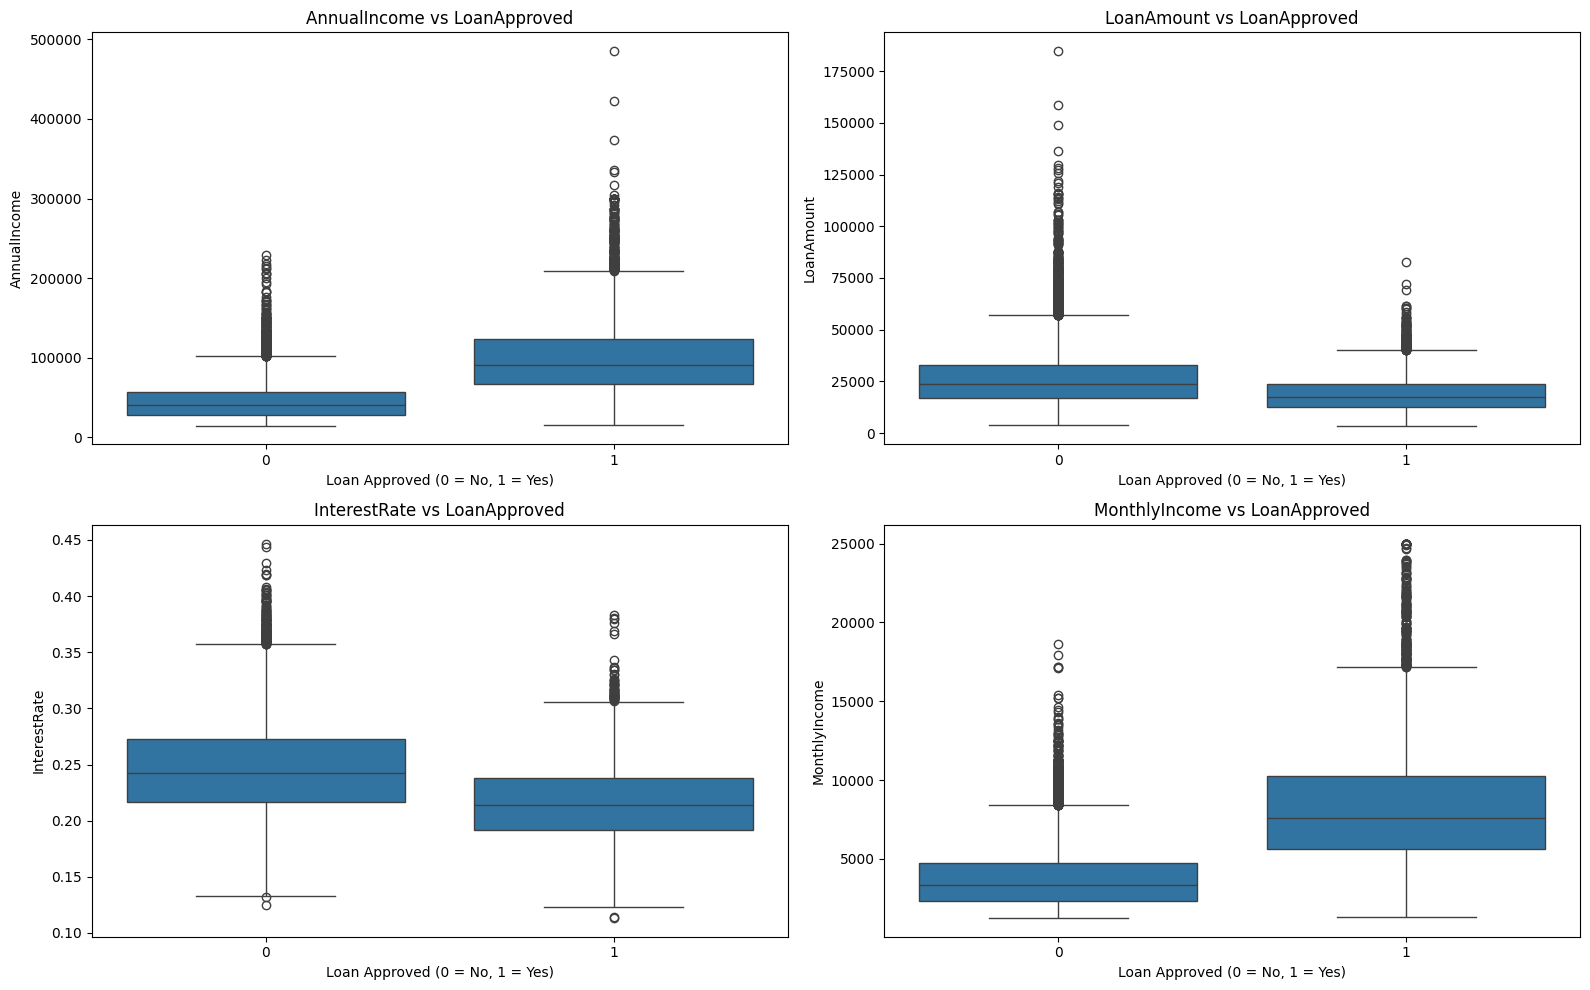

In [9]:
# List of top features to visualize
features_to_plot = ['AnnualIncome', 'LoanAmount', 'InterestRate', 'MonthlyIncome']

# Create boxplots
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='LoanApproved', y=feature, data=df1)
    plt.title(f'{feature} vs LoanApproved')
    plt.xlabel('Loan Approved (0 = No, 1 = Yes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

In [10]:
# Save the t-test summary to Excel or CSV
ttest_df.to_csv("t_test_results.csv", index=False)

In [11]:
# Check unique values in EmploymentStatus
df1['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

In [12]:
from scipy.stats import f_oneway

In [13]:
# Create income groups for ANOVA
income_employed = df1[df1['EmploymentStatus'] == 'Employed']['AnnualIncome']
income_self_employed = df1[df1['EmploymentStatus'] == 'Self-Employed']['AnnualIncome']
income_unemployed = df1[df1['EmploymentStatus'] == 'Unemployed']['AnnualIncome']

# Perform One-Way ANOVA
f_stat, p_val = f_oneway(income_employed, income_self_employed, income_unemployed)

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Annual Income among Employment Status groups.")
else:
    print("No significant difference in Annual Income among the groups.")


F-statistic: 2.729741033991338
P-value: 0.06526049051027527
No significant difference in Annual Income among the groups.


In [14]:
df1['EducationLevel'].value_counts()

EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64

In [15]:
df1['LoanPurpose'].value_counts()

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

In [16]:
# Group AnnualIncome by each Education Level
education_groups = [df1[df1['EducationLevel'] == level]['AnnualIncome'] for level in df1['EducationLevel'].unique()]

#Perform ANOVA
f_stat_edu, p_val_edu = f_oneway(*education_groups)

#output
print("Education Level ANOVA - Annual Income")
print("F-statistic:", f_stat_edu)
print("P-value:", p_val_edu)

if p_val_edu < 0.05:
    print("Statistically significant difference in Annual Income among Education Levels.")
else:
    print("No significant difference in Annual Income among Education Levels.")

Education Level ANOVA - Annual Income
F-statistic: 108.34979648363615
P-value: 1.6695442876122316e-91
Statistically significant difference in Annual Income among Education Levels.


In [17]:
#Group Annual Income by each LoanPurpose
purpose_groups = [df1[df1['LoanPurpose'] == level]['AnnualIncome'] for level in df1['LoanPurpose'].unique()]

#Perform ANOVA
f_stat_purp, p_val_purp = f_oneway(*purpose_groups)


#output
print("Pupose Level ANOVA - Annual Income")
print("F-statistic:", f_stat_purp)
print("P-value:", p_val_purp)

if p_val_purp < 0.05:
    print("Statistically significant difference in Annual Income among Loan Purposes.")
else:
    print("No significant difference in Annual Income among Loan Purposes.")

Pupose Level ANOVA - Annual Income
F-statistic: 2.0531686743606588
P-value: 0.08413420290184521
No significant difference in Annual Income among Loan Purposes.


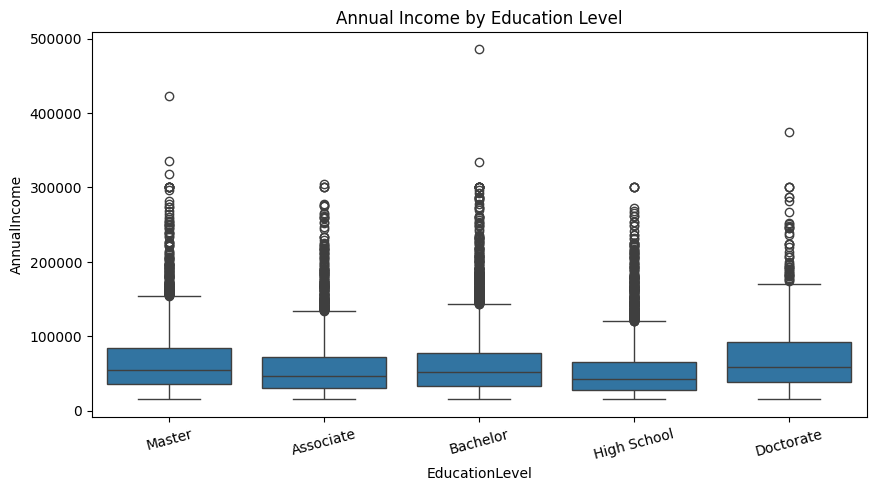

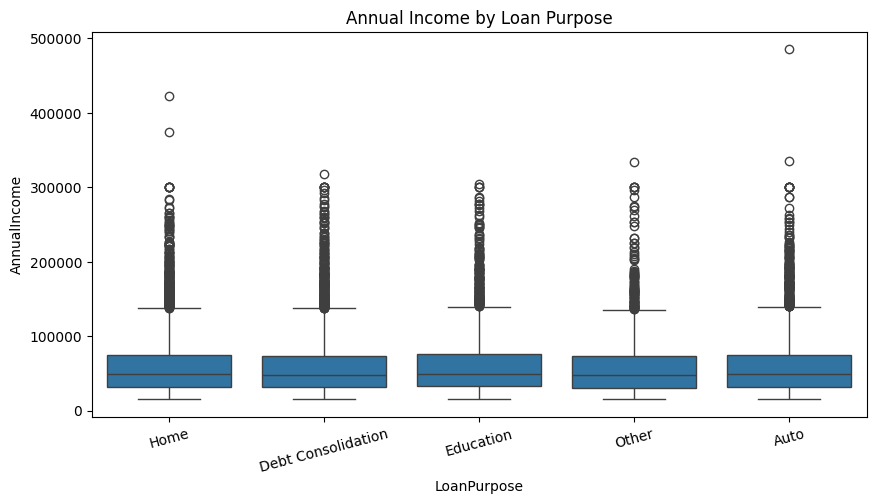

In [18]:
# Boxplot: Education Level vs Annual Income
plt.figure(figsize=(10, 5))
sns.boxplot(x='EducationLevel', y='AnnualIncome', data=df1)
plt.title("Annual Income by Education Level")
plt.xticks(rotation=15)
plt.show()

# Boxplot: Loan Purpose vs Annual Income
plt.figure(figsize=(10, 5))
sns.boxplot(x='LoanPurpose', y='AnnualIncome', data=df1)
plt.title("Annual Income by Loan Purpose")
plt.xticks(rotation=15)
plt.show()


In [19]:
!pip install statsmodels

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
#Run Tukey HSD
tukey_result = pairwise_tukeyhsd(
    df1['AnnualIncome'],
    df1['EducationLevel'],
    0.05
)

#Display result
print(tukey_result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1      group2     meandiff  p-adj     lower       upper    reject
-------------------------------------------------------------------------
  Associate    Bachelor   4705.2808    0.0   2491.6709   6918.8907   True
  Associate   Doctorate  15709.4859    0.0   11788.378  19630.5938   True
  Associate High School  -4870.1834    0.0  -7094.7038   -2645.663   True
  Associate      Master   9529.8728    0.0   6916.4534  12143.2923   True
   Bachelor   Doctorate  11004.2051    0.0   7210.2747  14798.1355   True
   Bachelor High School  -9575.4642    0.0 -11567.2753  -7583.6531   True
   Bachelor      Master    4824.592    0.0   2406.1666   7243.0175   True
  Doctorate High School -20579.6693    0.0 -24379.9759 -16779.3627   True
  Doctorate      Master  -6179.6131 0.0003 -10219.8854  -2139.3408   True
High School      Master  14400.0562    0.0  11971.6403  16828.4721   True
--------------------------------------

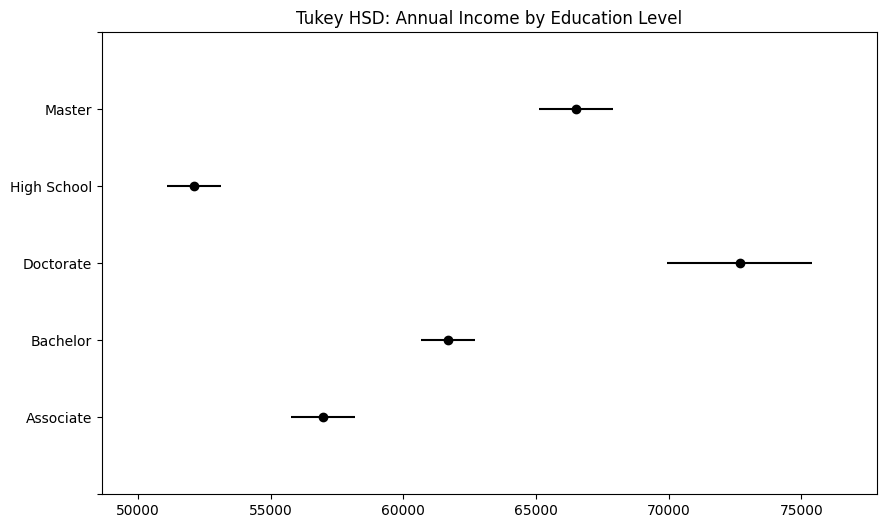

In [22]:
tukey_result.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD: Annual Income by Education Level")
plt.show()


In [23]:
# Tukey HSD for CreditScore by EducationLevel
tukey_credit = pairwise_tukeyhsd(
    df1['CreditScore'],
    df1['EducationLevel'],
    0.05
)

# Display results
print(tukey_credit)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
  Associate    Bachelor   9.6667   0.0   6.9149  12.4184   True
  Associate   Doctorate  30.4597   0.0  25.5853  35.3341   True
  Associate High School  -9.7371   0.0 -12.5024  -6.9718   True
  Associate      Master  19.3918   0.0   16.143  22.6406   True
   Bachelor   Doctorate   20.793   0.0  16.0767  25.5093   True
   Bachelor High School -19.4038   0.0 -21.8798 -16.9277   True
   Bachelor      Master   9.7251   0.0   6.7188  12.7315   True
  Doctorate High School -40.1968   0.0  -44.921 -35.4726   True
  Doctorate      Master -11.0679   0.0 -16.0904  -6.0454   True
High School      Master  29.1289   0.0  26.1101  32.1477   True
---------------------------------------------------------------


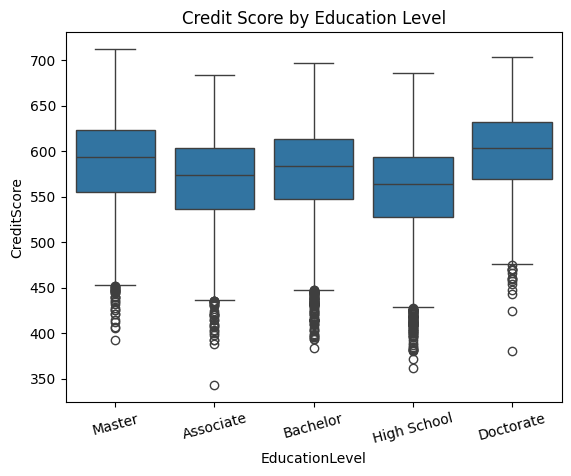

In [24]:
sns.boxplot(x='EducationLevel', y='CreditScore', data=df1)
plt.title('Credit Score by Education Level')
plt.xticks(rotation=15)
plt.show()

In [25]:
# Tukey HSD for LoanAmount by LoanPurpose
tukey_loan = pairwise_tukeyhsd(
    df1['LoanAmount'],
    df1['LoanPurpose'],
    0.05
)

# Display results
print(tukey_loan)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
      group1             group2        meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------
              Auto Debt Consolidation -144.5486 0.9865  -918.9028  629.8057  False
              Auto          Education  118.1844 0.9962  -764.3165 1000.6853  False
              Auto               Home -119.8824 0.9924  -867.6553  627.8906  False
              Auto              Other  -85.1432 0.9994 -1085.9703  915.6839  False
Debt Consolidation          Education   262.733 0.9152  -581.7163 1107.1823  False
Debt Consolidation               Home   24.6662    1.0  -677.7946  727.1271  False
Debt Consolidation              Other   59.4054 0.9998  -908.0354 1026.8462  False
         Education               Home -238.0668 0.9331 -1058.2098  582.0762  False
         Education              Other -203.3276 0.9848 -1259.3224  852.6673  False
    

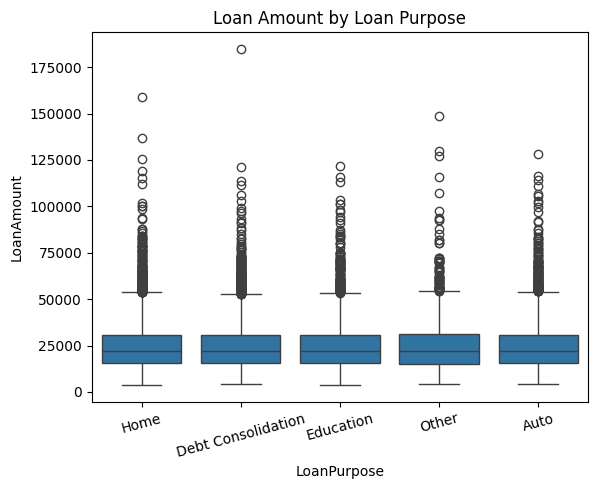

In [26]:
sns.boxplot(x='LoanPurpose', y='LoanAmount', data=df1)
plt.title('Loan Amount by Loan Purpose')
plt.xticks(rotation=15)
plt.show()

In [27]:
# Define groups
score_approved = df1[df1['LoanApproved'] == 1]['CreditScore']
score_not_approved = df1[df1['LoanApproved'] == 0]['CreditScore']

# Perform Welch's t-test
t_stat, p_val = ttest_ind(score_approved, score_not_approved, equal_var=False)

# Output
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Credit Score between approved and not approved.")
else:
    print("No significant difference in Credit Score between groups.")


T-statistic: 20.68243007707949
P-value: 1.0803826331980726e-92
Statistically significant difference in Credit Score between approved and not approved.


In [28]:
# Create groups
net_employed = df1[df1['EmploymentStatus'] == 'Employed']['NetWorth']
net_self_emp = df1[df1['EmploymentStatus'] == 'Self-Employed']['NetWorth']
net_unemployed = df1[df1['EmploymentStatus'] == 'Unemployed']['NetWorth']

# Run ANOVA
f_stat, p_val = f_oneway(net_employed, net_self_emp, net_unemployed)

# Output
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Net Worth across Employment Status.")
else:
    print("No significant difference in Net Worth across Employment Status.")


F-statistic: 2.270251059244799
P-value: 0.10331286632643119
No significant difference in Net Worth across Employment Status.


In [29]:
# Define groups
inc_approved = df1[df1['LoanApproved'] == 1]['MonthlyIncome']
inc_not_approved = df1[df1['LoanApproved'] == 0]['MonthlyIncome']

# Perform t-test
t_stat, p_val = ttest_ind(inc_approved, inc_not_approved, equal_var=False)

# Output
print("MonthlyIncome T-test:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Monthly Income between approved and not approved.")
else:
    print("No significant difference in Monthly Income.")


MonthlyIncome T-test:
T-statistic: 76.45864995177443
P-value: 0.0
Statistically significant difference in Monthly Income between approved and not approved.


In [30]:
# Group CreditScore by each MaritalStatus
score_groups = [df1[df1['MaritalStatus'] == status]['CreditScore'] for status in df1['MaritalStatus'].unique()]

# Run ANOVA
f_stat, p_val = f_oneway(*score_groups)

# Output
print("\nCreditScore ANOVA by MaritalStatus")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Credit Score among marital status groups.")
else:
    print("No significant difference in Credit Score by marital status.")



CreditScore ANOVA by MaritalStatus
F-statistic: 0.315380055291078
P-value: 0.8142809145634823
No significant difference in Credit Score by marital status.


In [31]:
# Define groups
net_approved = df1[df1['LoanApproved'] == 1]['NetWorth']
net_not_approved = df1[df1['LoanApproved'] == 0]['NetWorth']

# Perform t-test
t_stat, p_val = ttest_ind(net_approved, net_not_approved, equal_var=False)

# Output
print("NetWorth T-test:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Net Worth between approved and not approved.")
else:
    print("No significant difference in Net Worth.")


NetWorth T-test:
T-statistic: 19.183919695724658
P-value: 1.956839572242425e-79
Statistically significant difference in Net Worth between approved and not approved.


In [32]:
# Group MonthlyDebtPayments by EducationLevel
debt_groups = [df1[df1['EducationLevel'] == level]['MonthlyDebtPayments'] for level in df1['EducationLevel'].unique()]

# Run ANOVA
f_stat, p_val = f_oneway(*debt_groups)

# Output
print("\nMonthlyDebtPayments ANOVA by EducationLevel")
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Statistically significant difference in Monthly Debt Payments among education levels.")
else:
    print("No significant difference in Monthly Debt Payments by education level.")



MonthlyDebtPayments ANOVA by EducationLevel
F-statistic: 0.9423547884188253
P-value: 0.4381338281319197
No significant difference in Monthly Debt Payments by education level.
